<a href="https://colab.research.google.com/github/PedroMurta/Projetos-Data-Science/blob/master/IMDB_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

#### IMDB TV Series Dataset
#### IMDB Top 2000 Series According to Number of Votes
##### This [Dataset](https://www.kaggle.com/harshitshankhdhar/tv-series-dataset) was found on kaggle page.


##### **Context**
- This data is scraped from IMDB site according to the number of votes they get on IMDB. It contains 2000 rows and 13 columns.

##### **Content**

  * Poster_Link - Link of the poster that imdb using.

  * Series_Title - Name of the series.
   
  * RuntimeofSeries - Year at which series started to series end.

  * Certificate - Certificate earned by that series.

  * RuntimeofEpisodes - Total runtime of the episodes in series.

  * Genre - Genre of the series.
   
  * IMDBRating - Rating of the series at IMDB site.
   
  * Overview - mini story/summary.
   
  * Star1,Star2,Star3,Star4 - Name of the Stars in TV Shows.

  * No of votes - Total number of votes.


# Exploratory Analysis

To begin this exploratory analysis, it's necessary to import the database and some libraries and try to find something relevant.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos Dataset/series_data.xls')

In [5]:
df.head(3)

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


To improve the visualization, you should rename the columns

In [24]:
df.columns = ['Poster', 'Title', 'RuntimeSerie', 'Certificate', 'RuntimeEpisode', 'Genre', 'Rating', 'Overview', 'Actor1', 'Actor2', 'Actor3', 'Actor4', 'NVotes']

In [7]:
df.head(2)

,Poster,Title,RuntimeSeries,Certificate,RuntimeEpisodes,Genre,Rating,Overview,Actor1,Actor2,Actor3,Actor4,NVotes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887


Now we look at the data types to see if we find anything strange.

In [8]:
df.dtypes

Poster              object
Title               object
RuntimeSeries       object
Certificate         object
RuntimeEpisodes     object
Genre               object
Rating             float64
Overview            object
Actor1              object
Actor2              object
Actor3              object
Actor4              object
NVotes               int64
dtype: object

In [11]:
df.describe()

,Rating,NVotes
count,2000.000000,2.000000e+03
mean,7.591300,3.770391e+04
std,0.898731,8.843231e+04
min,1.000000,5.109000e+03
25%,7.200000,7.745500e+03
50%,7.700000,1.316100e+04
75%,8.200000,3.132200e+04
max,9.700000,1.773458e+06


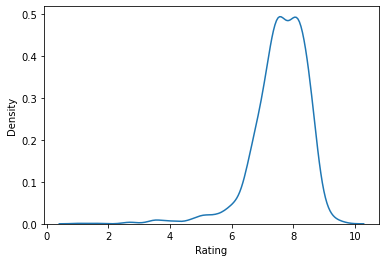

In [15]:
sns.kdeplot(data=df.Rating)

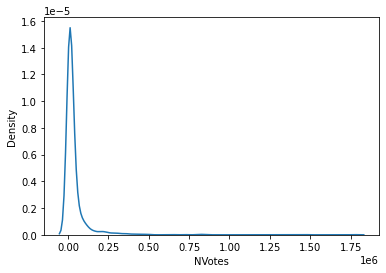

In [20]:
sns.kdeplot(data=df.NVotes);

In [18]:
df.corr()

,Rating,NVotes
Rating,1.000000,0.242255
NVotes,0.242255,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Poster           2000 non-null   object 
 1   Title            2000 non-null   object 
 2   RuntimeSeries    2000 non-null   object 
 3   Certificate      703 non-null    object 
 4   RuntimeEpisodes  1957 non-null   object 
 5   Genre            2000 non-null   object 
 6   Rating           2000 non-null   float64
 7   Overview         2000 non-null   object 
 8   Actor1           2000 non-null   object 
 9   Actor2           2000 non-null   object 
 10  Actor3           1999 non-null   object 
 11  Actor4           1995 non-null   object 
 12  NVotes           2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


As we can see, we have some missing values and we gonna work with it at the next step.

# Work with Dataset.

Now we work 

In [10]:
df.isnull().sum()

Poster                0
Title                 0
RuntimeSeries         0
Certificate        1297
RuntimeEpisodes      43
Genre                 0
Rating                0
Overview              0
Actor1                0
Actor2                0
Actor3                1
Actor4                5
NVotes                0
dtype: int64

Let's Work with `Certificate` column missing values

In [22]:
df.Certificate.value_counts()

18           231
16           133
16+           49
15+           45
A             42
13            42
18+           41
U             29
12+           18
7             16
UA            14
PG            13
13+            9
All            6
Not Rated      6
15             4
7+             3
R              2
Name: Certificate, dtype: int64

we will standardize this strange and redundant data creating a function. 

In [23]:
def categorize(s):
    if s == '16+':
        return '16'
    elif s == '18+':
        return '18'
    elif s == 'U':
        return '0'
    elif s == '7+':
        return '7'
    elif s == '15+':
        return '15'
    elif s == '12+':
        return '12'
    elif s == 'All':
        return '0'
    elif s == '13+':
        return '13'
    elif s == 'A':
        return '18'
    elif s == 'Not Rated':
        return '13'
    elif s == 'R':
        return '17'
    elif s == 'UA':
        return '12'
    elif s == 'PG':
        return '12'
    elif s == '18':
        return '18'
    elif s == '15':
        return '15'

Let's create a new Column with this new values

In [25]:
df['Certificates'] = df['Certificate'].apply(categorize)

In [27]:
df.Certificates.value_counts()

18    314
15     49
16     49
12     45
0      35
13     15
7       3
17      2
Name: Certificates, dtype: int64

And we do the same with RuntimeEpisode column.

In [29]:
df.RuntimeEpisode.value_counts().sum()

1957

In [31]:
df['RuntimeEpisodes'] = df['RuntimeEpisode'].str.replace(' min', '')

This missing values will be replaced by mode of each one column.

In [35]:
df.Certificates.fillna(df['Certificates'].mode()[0], inplace=True)
df.RuntimeEpisodes.fillna(df['RuntimeEpisodes'].mode()[0], inplace=True)

In [36]:
df.isnull().sum()

Poster                0
Title                 0
RuntimeSerie          0
Certificate        1297
RuntimeEpisode       43
Genre                 0
Rating                0
Overview              0
Actor1                0
Actor2                0
Actor3                1
Actor4                5
NVotes                0
Certificates          0
RuntimeEpisodes       0
dtype: int64

Now we should delete some columns unecessary.

In [37]:
df.drop('RuntimeSerie', axis=1, inplace=True)
df.drop('Certificate', axis=1, inplace=True)
df.drop('Actor1', axis=1, inplace=True)
df.drop('Actor2', axis=1, inplace=True)
df.drop('Actor3', axis=1, inplace=True)
df.drop('Actor4', axis=1, inplace=True)
df.drop('Poster', axis=1, inplace=True)

In [39]:
df.head(2)

,Title,RuntimeEpisode,Genre,Rating,Overview,NVotes,Certificates,RuntimeEpisodes
0,Game of Thrones,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,1773458,18,57
1,Breaking Bad,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,1468887,18,49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


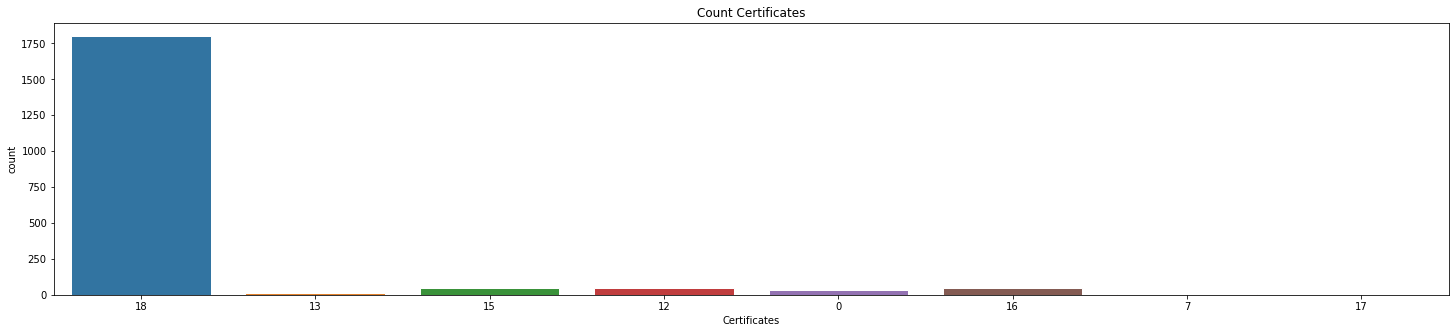

In [41]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.set_style('darkgrid')
g = sns.countplot(df.Certificates)
g.set_title('Count Certificates')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


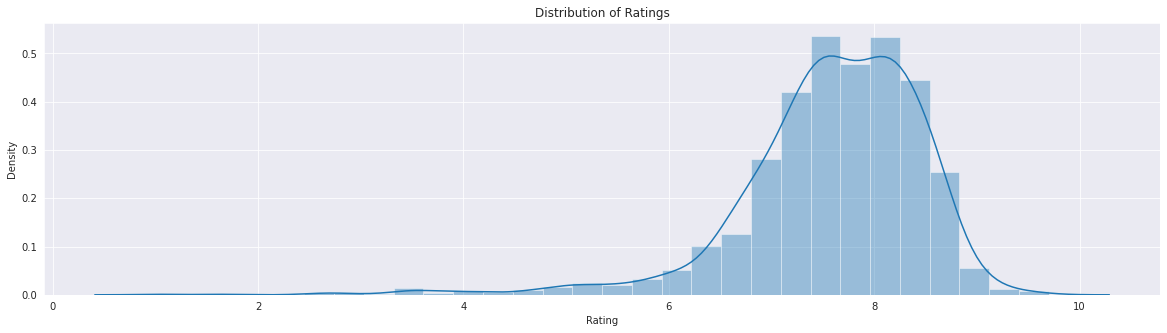

In [43]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(df['Rating'],bins=30)
g.set_title("Distribution of Ratings")
plt.show();

# Preparating Machine Learning Models 

At this step, we will use TF-IDF(Term Frequency-Inverse Document Frequency ) score. which is the frequency of a word occurring in a document/text, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

then we'll use similarity cosine because it is independent of magnitude and is relatively easy and fast to calculate. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRurOqbmPicG3amy2KQpLcQkfOoSyiZQjbomA&usqp=CAU">




In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english')
cvm=cv.fit_transform(df['Overview'])

Lets import `Linear_kernel` from sklearn to find the data similarity

In [45]:
from sklearn.metrics.pairwise import linear_kernel
s = linear_kernel(cvm, cvm)

indices = pd.Series(df.index, index=df.Title).drop_duplicates()

def getRecomendations(title, s=s):
    idx = indices[title]    
    s_scores = list(enumerate(s[idx]))
    s_scores = sorted(s_scores, key=lambda x: x[1], reverse=True)
    s_scores = s_scores[1:11]
    serie_indices = [i[0] for i in s_scores]
    

    return df['Title'].iloc[serie_indices]


# Testing the model

In [46]:
getRecomendations('This Is Us')

1388        The War at Home
1594     Childrens Hospital
1080    The Incredible Hulk
1645       One Strange Rock
654                Runaways
1527              Outsiders
1389               Eastwick
1302          Party of Five
732         Yeh Meri Family
1538         Still Standing
Name: Title, dtype: object

In [49]:
getRecomendations('The Batman')

597           Batman Beyond
1350             Pennyworth
512                  Colony
559              Spider-Man
147     The Legend of Korra
1821                    APB
23                Daredevil
1104          Second Chance
66                   Gotham
1492         The Apprentice
Name: Title, dtype: object

In [50]:
getRecomendations('Wonder Woman')

963                                Superman
1395           Teenage Mutant Ninja Turtles
1230              Dr. Quinn, Medicine Woman
242                                  Titans
792     Kôkaku kidôtai: Stand Alone Complex
1727                             Clone High
489                           Young Justice
49                                 The Boys
1632                           The Avengers
836                The Adventures of Tintin
Name: Title, dtype: object

In [51]:
getRecomendations('Dragon Ball Z')

232         Dragon Ball Z: Doragon bôru zetto
1943    Kung Fu Panda: Legends of Awesomeness
508              Teenage Mutant Ninja Turtles
757       My Little Pony: Friendship Is Magic
291                               Dragon Ball
1102                              Sailor Moon
1314                                Taz-Mania
613         Dragon Ball GT: Doragon bôru jîtî
1780                                  Popular
742                               Invader ZIM
Name: Title, dtype: object